# Задание к занятию «Мастер-класс визуализации данных на Python»

Для задания выбран датасет [Homicide Reports, 1980-2014](https://www.kaggle.com/murderaccountability/homicide-reports)

In [17]:
# Python 2 and 3 compatibility
# pip install future
from __future__ import (absolute_import, division,
                        print_function, unicode_literals)
# отключим предупреждения Anaconda
import warnings
warnings.simplefilter('ignore')

# будем отображать графики прямо в jupyter'e
%pylab inline
#графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 8,5
import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [18]:
df = pd.read_csv('./data/homocide-reports.csv')
print(df.shape)

(638454, 24)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 638454 entries, 0 to 638453
Data columns (total 24 columns):
Record ID                638454 non-null int64
Agency Code              638454 non-null object
Agency Name              638454 non-null object
Agency Type              638454 non-null object
City                     638454 non-null object
State                    638454 non-null object
Year                     638454 non-null int64
Month                    638454 non-null object
Incident                 638454 non-null int64
Crime Type               638454 non-null object
Crime Solved             638454 non-null object
Victim Sex               638454 non-null object
Victim Age               638454 non-null int64
Victim Race              638454 non-null object
Victim Ethnicity         638454 non-null object
Perpetrator Sex          638454 non-null object
Perpetrator Age          638454 non-null object
Perpetrator Race         638454 non-null object
Perpetrator Ethnicity    6384

In [20]:
#Преобразуем колонку в число
df['Perpetrator Age'] = pd.to_numeric(df['Perpetrator Age'], errors='coerce')
#Удалим из выборки убийц младше 11 лет (отсеим выбросы и ошибочные данные)
df = df[df['Perpetrator Age'] > 10]
#Удалим из выборки жертв старше 90 лет (отсеим выбросы и ошибочные данные)
df = df[df['Victim Age'] <= 90]

In [21]:
df.describe()

,Record ID,Year,Incident,Victim Age,Perpetrator Age,Victim Count,Perpetrator Count
count,417090.000000,417090.000000,417090.000000,417090.000000,417090.000000,417090.000000,417090.000000
mean,312963.347982,1995.469608,20.655142,32.587444,30.751747,0.133094,0.240536
std,186597.665455,10.034826,90.848587,16.437925,12.757326,0.582148,0.667390
min,1.000000,1980.000000,0.000000,0.000000,11.000000,0.000000,0.000000
25%,148438.500000,1987.000000,1.000000,22.000000,21.000000,0.000000,0.000000
50%,309806.500000,1994.000000,2.000000,30.000000,27.000000,0.000000,0.000000
75%,475679.750000,2004.000000,7.000000,41.000000,37.000000,0.000000,0.000000
max,638454.000000,2014.000000,999.000000,90.000000,99.000000,10.000000,10.000000


In [22]:
df = df.dropna()
print(df.shape)

(417090, 24)


In [23]:
df.head()

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15.0,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42.0,White,Unknown,Acquaintance,Strangulation,0,0,FBI
5,6,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,...,Unknown,Male,36.0,White,Unknown,Acquaintance,Rifle,0,0,FBI
6,7,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,...,Unknown,Male,27.0,Black,Unknown,Wife,Knife,0,0,FBI


Посмотрим на динамику по количеству убийств по годам (Time Series). Отрисуем при помощи plotly.

In [24]:
#выберем 2 колонки и посчитаем количество записей об убийствах по годам
df_year_homicide_dynamic = df[['Record ID', 'Year']].groupby('Year').count()
#переименуем колонку 'Record ID' в 'Homocides'
df_year_homicide_dynamic.columns = ['Homocides']
df_year_homicide_dynamic.head()

,Homocides
Year,
1980,16022
1981,15220
1982,14527
1983,13874
1984,12626


In [25]:
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

init_notebook_mode(connected=True)

trace = go.Scatter(
    x=df_year_homicide_dynamic.index,
    y=df_year_homicide_dynamic.Homocides,
    name='Hoomocides'
)

data = [trace]
layout = {'title': 'Statistics of homocides'}

fig = go.Figure(data=data, layout=layout)

iplot(fig) #, show_link=False)

Посмотрим какими орудимиями совершалось более всего убийств (Rankinig). Отрисуем при помощи matplotlib.

In [26]:
#выберем 2 колонки и сгруппируем по типу орудия убийства
df_weapon = df[['Record ID', 'Weapon']].groupby('Weapon').count()
df_weapon.columns = ['Count']
df_weapon = df_weapon.sort_values(by='Count',ascending=False)
df_weapon.head(20)

,Count
Weapon,
Handgun,198152
Knife,72146
Blunt Object,49124
Shotgun,24860
Firearm,21527
Rifle,18900
Unknown,16999
Strangulation,4270
Fire,3920


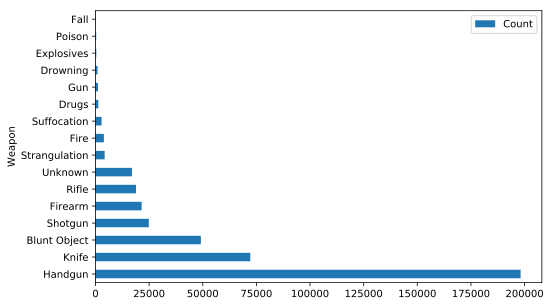

In [27]:
df_weapon.plot(kind='barh')

Посмотрим на распредление возраста убийц. Отрисуем при помощи seaborn.

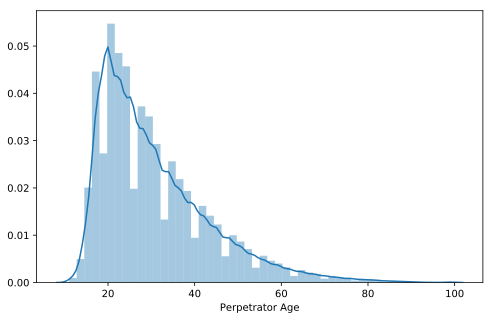

In [28]:
sns.distplot(df['Perpetrator Age'])

Посмотрим на зависимость возраста жерты от возраста убийц (возьмем 5000 случайных объектов). Отрисуем при помощи seaborn. 

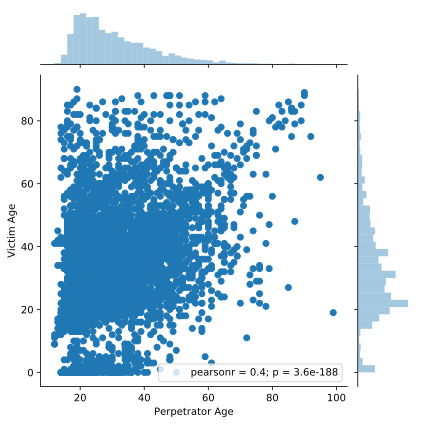

In [29]:
sns.jointplot(x='Perpetrator Age', y='Victim Age', data=df.sample(5000), kind='scatter');

Посмотрим на основные статистики возраста жертв, сгрупированные по полу убийц. Отрисуем при помощи seaborn. 

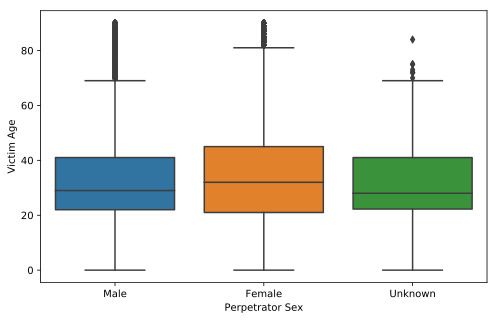

In [30]:
sns.boxplot(x="Perpetrator Sex", y="Victim Age", data=df)